# El Problema Circular Restringido de los Tres Cuerpos (CRTBP)

In [1]:
from numpy import *
from scipy.optimize import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline
DEG=pi/180

# Ecuaciones de Movimiento

In [2]:
def eom(q,t,mu):
    r1=array([-mu,0,0])
    r2=array([1-mu,0,0])
    omega=array([0,0,1])
    
    r=q[:3]
    v=q[3:]
    
    R1=r-r1
    R2=r-r2
    
    drdt=v
    dvdt=-(1-mu)/norm(R1)**3*R1-mu/norm(R2)**3*R2-cross(omega,cross(omega,r))-2*cross(omega,v)
    
    dqdt=drdt.tolist()+dvdt.tolist()
    
    return dqdt

def JacobiConstant(r,v,mu):
    r1=array([-mu,0,0])
    r2=array([1-mu,0,0])
    omega=array([0,0,1])
    
    R1=r-r1
    R2=r-r2
    
    C=norm(v)**2-2*(1-mu)/norm(R1)-2*mu/norm(R2)-(r[0]**2+r[1]**2)
    return C

# Condiciones Iniciales

In [10]:
mu=0.012
r=array([0,0,0])
v=array([0.4,3.83,0])

#Jacobi Constant
C=JacobiConstant(r,v,mu)
print "Jacobi Constant:",C

#Pseudo potential
x=linspace(-3,3,100)
y=linspace(-3,3,100)
X,Y=meshgrid(x,y)
V=(-2*(1-mu)/sqrt((X+mu)**2+Y**2)-2*mu/sqrt((X-(1-mu))**2+Y**2)-(X**2+Y**2)-C)/2

Jacobi Constant: -149.862058165


# Solución

In [11]:
Nt=1000
ts=linspace(0,30.0,1000)
q=r.tolist()+v.tolist()
solution=odeint(eom,q,ts,args=(mu,))

rs=solution[:,:3]
vs=solution[:,3:]

/home/main/anaconda2/lib/python2.7/site-packages/scipy/integrate/odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


# Trayectoria y curvas de cero velocidad

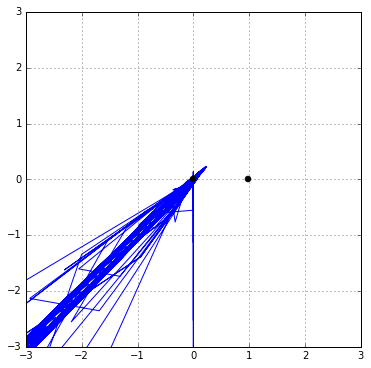

In [12]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()

ax.plot(rs[:,0],rs[:,1])
ax.plot([-mu],[0],'ko')
ax.plot([1-mu],[0],'ko')
ax.contour(X,Y,V,levels=[0,],colors=['r'])

max=3
ax.set_xlim((-max,max))
ax.set_ylim((-max,max))
ax.grid()

# Puntos de Lagrange

In [13]:
# Función definitoria
def lagrangePoints(x,mu):
    x1=-mu
    x2=1-mu
    f=(1-mu)*(x-x1)/(abs(x-x1))**3+mu*(x-x2)/(abs(x-x2))**3-x
    return f

In [16]:
x1=-mu
x2=1-mu
# Puntos no colineales
L4=[cos(60*DEG)-mu,sin(60*DEG),0]
L5=[cos(60*DEG)-mu,-sin(60*DEG),0]

# Puntos colineales
L1x=bisect(lagrangePoints,0,1-mu-mu/10,args=(mu,))
L2x=bisect(lagrangePoints,(1-mu)+mu/10,2,args=(mu,))
L3x=bisect(lagrangePoints,-3,-mu-mu/10,args=(mu,))

print (L1x-x1)*384400.0 #km
print (L2x-x1)*384400.0 #km
print (L3x-x1)*384400.0 #km

L1=array([L1x,0,0])
L2=array([L2x,0,0])
L3=array([L3x,0,0])

326608.790751
448633.289888
-381709.163643


# Gráfico

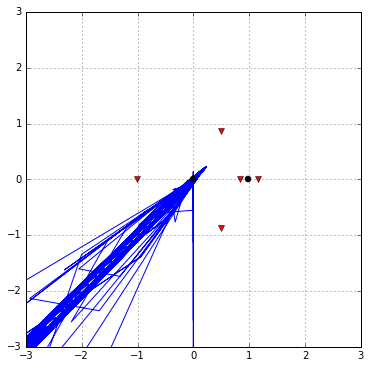

In [15]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()

ax.plot(rs[:,0],rs[:,1])
ax.plot([-mu],[0],'ko')
ax.plot([1-mu],[0],'ko')

ax.plot(L1[0],L1[1],'rv')
ax.plot(L2[0],L2[1],'rv')
ax.plot(L3[0],L3[1],'rv')
ax.plot(L4[0],L4[1],'rv')
ax.plot(L5[0],L5[1],'rv')

ax.contour(X,Y,V,levels=[0,],colors=['r'])

max=3
ax.set_xlim((-max,max))
ax.set_ylim((-max,max))
ax.grid()